## UMAP Characterization of query samples and references 

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import os

In [2]:
# Change the current working directory to the parent directory
os.chdir('..')

In [3]:
os.getcwd()

'/Users/manuelsokolovr/Desktop/BrainSingleCellAnalysis'

In [4]:
def normalize_and_plot_umap(combined):
    sc.pp.normalize_total(combined, target_sum=1e4)
    sc.pp.log1p(combined)
    sc.pp.neighbors(combined)
    sc.tl.umap(combined)
    sc.pl.umap(combined, color="CellClass")

## UMAP of all the references used alongside with query data

In [5]:
full_fetal_reference = sc.read_h5ad("data/full_fetal_brain/h5ad/down_fullref.h5ad")
hiPSC_WA09 = sc.read_h5ad("data/hiPSC/h5ad/jovanovic_Astro.h5ad")
hiPSC_FCDI = sc.read_h5ad("data/hiPSC/h5ad/jovanovic_FCDI.h5ad")
hiPSC_Glu = sc.read_h5ad("data/hiPSC/h5ad/jovanovic_Glu.h5ad")
query_0h = sc.read_h5ad("data/querys/unnorm_sc_C32_notreatment.h5ad")
query_24h = sc.read_h5ad("data/querys/unnorm_sc_C32-24h.h5ad")
query_72h = sc.read_h5ad("data/querys/unnorm_sc_C32-72h.h5ad")

hiPSC_WA09.obs["CellClass"] = hiPSC_WA09.obs.ident
hiPSC_FCDI.obs["CellClass"] = hiPSC_FCDI.obs.ident
hiPSC_Glu.obs["CellClass"] = hiPSC_Glu.obs.ident

query_0h.obs["CellClass"] = "0H"
query_24h.obs["CellClass"] = "24H"
query_72h.obs["CellClass"] = "72H"

In [6]:
combined = ad.concat([full_fetal_reference,hiPSC_WA09, hiPSC_FCDI, hiPSC_Glu, query_0h, query_24h, query_72h], join="outer")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


         Falling back to preprocessing with `sc.pp.pca` and default params.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


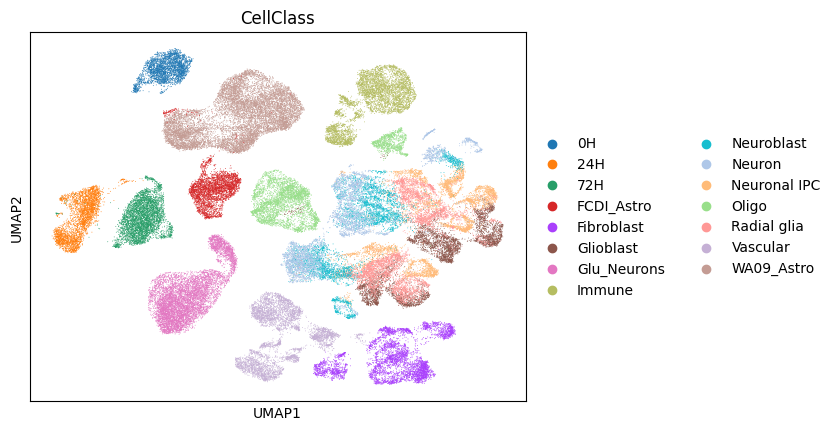

In [7]:
normalize_and_plot_umap(combined)

## UMAP of queries and full reference

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


         Falling back to preprocessing with `sc.pp.pca` and default params.


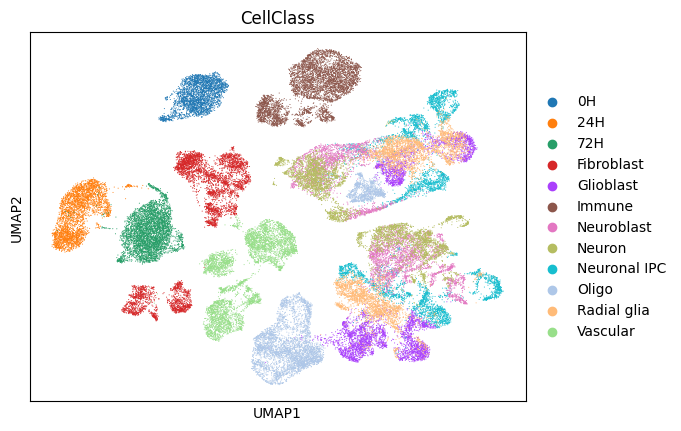

In [8]:
combined = ad.concat([full_fetal_reference, query_0h, query_24h, query_72h], join="outer")
normalize_and_plot_umap(combined)

## UMAP of querys and hiPSC

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


         Falling back to preprocessing with `sc.pp.pca` and default params.


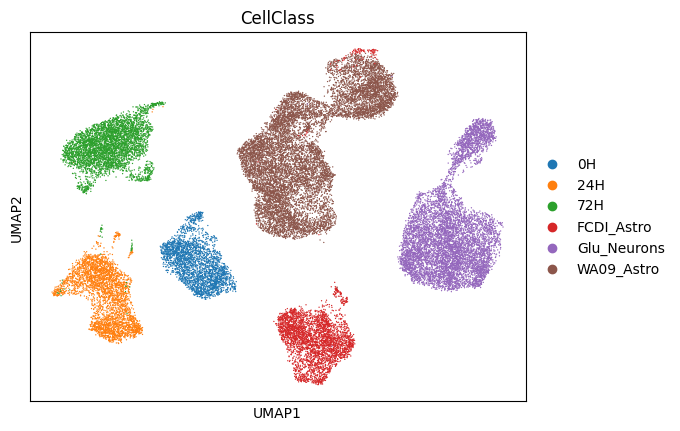

In [9]:
combined = ad.concat([hiPSC_WA09, hiPSC_FCDI, hiPSC_Glu, query_0h, query_24h, query_72h], join="outer")
normalize_and_plot_umap(combined)

## UMAP of querys

         Falling back to preprocessing with `sc.pp.pca` and default params.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


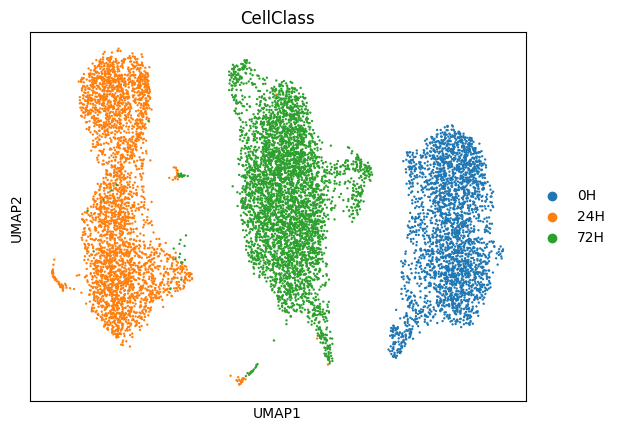

In [10]:
combined = ad.concat([query_0h, query_24h, query_72h], join="outer")
normalize_and_plot_umap(combined)